In [303]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, misc
import allantools
from allantools import noise

data = np.fromfile('2017_6_20_17_7_40_adc1data.dat',dtype=np.int16,count = 1000000000) #Read binary file into an array

range_sample_extent = 4096

if np.size(data)%range_sample_extent != 0:
        a = np.size(data) - np.size(data)%range_sample_extent
        data = data[:a]
print(np.size(data))

num_pulses = np.int(np.size(data))/(2*range_sample_extent)
print(num_pulses)

999997440
122070.0


In [304]:
offset = 4096*10
range_bin = 1671 + offset

   
Z = data[(2*range_bin)::(2*range_sample_extent)] + 1j * data[((2*range_bin)+1)::(2*range_sample_extent)]

print(Z)

[-1873.  -2.j -1861.-257.j -1912.-252.j ...,  4304.-719.j  4577.-737.j
  4940.-658.j]


In [307]:
t = np.arange(0,np.size(Z))
#make filter type(order,)
b, a = signal.butter(3, 0.4)

zi = signal.lfilter_zi(b, a)
z, _ = signal.lfilter(b, a, Z, zi=zi*Z[0])
z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])

y = signal.filtfilt(b, a, Z)



<IPython.core.display.Javascript object>


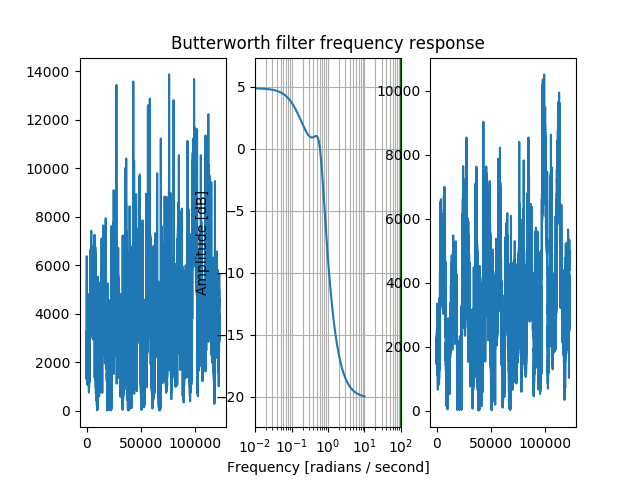

In [312]:
plt.figure()

plt.subplot(131)
plt.plot(np.abs(Z))
plt.show()

plt.subplot(132)
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

plt.subplot(133)
plt.plot(np.abs(y))
plt.show()

In [309]:
bin_phase = np.angle(y)


bin_unwrphase = np.unwrap(bin_phase,discont=np.pi)
bin_mag = np.abs(y)

bin_phase_pi = np.zeros(np.size(bin_phase))
for i in range(np.size(bin_phase)):
    bin_phase_pi[i] = bin_phase[i]+np.pi

print(bin_phase)
print(bin_phase_pi)

bin_unwrphase_pi = np.unwrap(bin_phase_pi,discont=np.pi)


[-3.14047572 -3.0459934  -2.9843461  ..., -0.19091069 -0.14281446
 -0.13239703]
[  1.11692960e-03   9.55992515e-02   1.57246558e-01 ...,   2.95068197e+00
   2.99877819e+00   3.00919562e+00]


In [310]:
my_unwrap = np.zeros(np.size(bin_phase_pi))


my_unwrap = bin_phase_pi



spike_threshold = 0.5

for i in range(np.size(my_unwrap-1)):
    
    #if np.abs(bin_phase_pi[i]-bin_phase_pi[i-1])>spike_threshold and np.abs(bin_phase_pi[i]-bin_phase_pi[i+1])>spike_threshold:
        #bin_phase_pi[i]=bin_phase_pi[i-1]
            
    if bin_phase_pi[i] - bin_phase_pi[i-1] > np.pi:# and bin_phase_pi[i+1]:
        my_unwrap[i:] = my_unwrap[i:] - (2*np.pi)
    if bin_phase_pi[i] - bin_phase_pi[i-1] < np.pi:
        my_unwrap[i:] = my_unwrap[i:] + (2*np.pi)

<IPython.core.display.Javascript object>


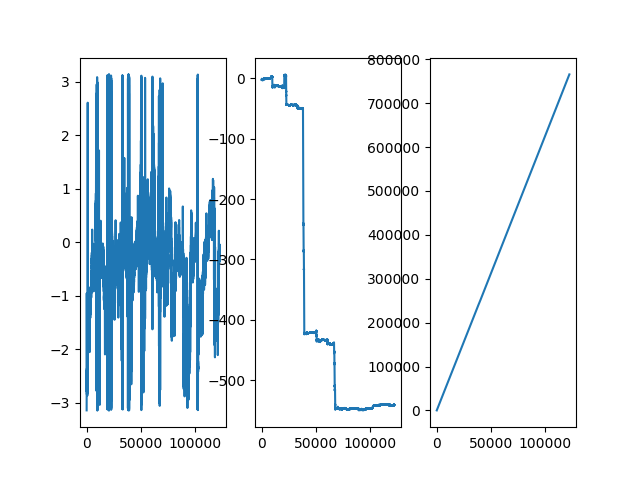

In [311]:
%matplotlib notebook 

plt.figure()
# Phase
plt.subplot(131)
plt.plot(bin_phase)
plt.show()
# Unwraped Phase
plt.subplot(132)
plt.plot(bin_unwrphase)
plt.show()

plt.subplot(133)
plt.plot(my_unwrap)
plt.show()

<IPython.core.display.Javascript object>


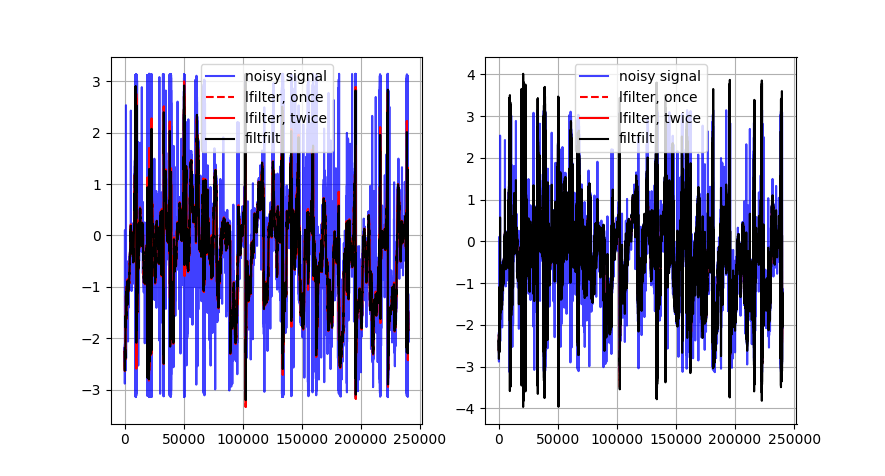

In [121]:
t = np.arange(0,np.size(bin_phase))
#make filter type(order,)
b, a = signal.butter(3, 0.05)
b2, a2 = signal.butter(3, 0.5)

zi = signal.lfilter_zi(b, a)
z, _ = signal.lfilter(b, a, bin_phase, zi=zi*bin_phase[0])
z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])

y = signal.filtfilt(b, a, bin_phase)

zi2 = signal.lfilter_zi(b, a)
z2, _ = signal.lfilter(b, a, bin_phase, zi=zi*bin_phase[0])
z22, _ = signal.lfilter(b, a, z, zi=zi*z[0])

y2 = signal.filtfilt(b2, a2, bin_phase)


%matplotlib notebook 

plt.figure()
# Phase
plt.subplot(121)
plt.plot(t, bin_phase, 'b', alpha=0.75)
plt.plot(t, z, 'r--', t, z2, 'r', t, y, 'k')
plt.legend(('noisy signal', 'lfilter, once', 'lfilter, twice','filtfilt'), loc='best')
plt.grid(True)
plt.show()
# Unwraped Phase
plt.subplot(122)
plt.plot(t, bin_phase, 'b', alpha=0.75)
plt.plot(t, z2, 'r--', t, z22, 'r', t, y2, 'k')
plt.legend(('noisy signal', 'lfilter, once', 'lfilter, twice','filtfilt'), loc='best')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


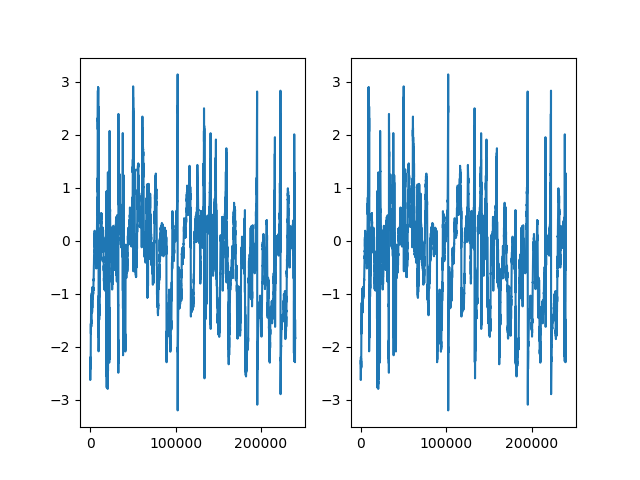

<IPython.core.display.Javascript object>